In [12]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from typing import Optional
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [13]:
def load_data_to_data_frame(file_path:str,sep:str=None)->Optional[DataFrame]:
  '''
  Load data from a local file path.
  Args:
      - file_path (str): The path to the file to be loaded
  Returns:
      - Optional[DataFrame]: A panda DataFrame containing the loaded data
  '''
  try:
    df = pd.read_csv(file_path,sep=sep)
    return df
  except:
    print("Error loading data")
    return None

In [14]:
data = load_data_to_data_frame("../data/bank-full.csv" , sep=";")

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
df = data.drop(columns=['default','loan'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [19]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


In [20]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [21]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.2+ MB


In [23]:
df.isnull().sum() 

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [24]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [25]:
numerical = df.select_dtypes(include=[np.number]).columns.tolist()
numerical.pop(-1)
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [26]:
categorical =  df.select_dtypes(include=[object]).columns.tolist()
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [27]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0,max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [28]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [29]:
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8985843839858438

#### Question 1: ROC AUC feature importance

In [30]:
auc_scores = {}
for i in numerical:
    auc_score = roc_auc_score(y_train, df_train[i])
    if auc_score < 0.5:
        auc_score = roc_auc_score(y_train, -df_train[i])
    print('%9s, %.5f' % (i, auc_score))
    auc_scores[i] = auc_score

      age, 0.51219
  balance, 0.58883
      day, 0.52596
 duration, 0.81470
 campaign, 0.57145
    pdays, 0.59013
 previous, 0.59857


In [31]:
max_key = max(auc_scores, key=auc_scores.get)
max_key, auc_scores[max_key]

('duration', 0.8147002759670778)

#### Question 2: Training the model

In [32]:
y_pred = model.predict_proba(X_val)[:, 1]

In [33]:
auc_score = roc_auc_score(y_val, y_pred)
print(round(auc_score,3))

0.9


#### Question 3: Precision and Recall

In [34]:
from sklearn.metrics import precision_recall_curve

In [35]:
thresholds = np.arange(0.0, 1.01, 0.01)

scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))
    
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)


In [36]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

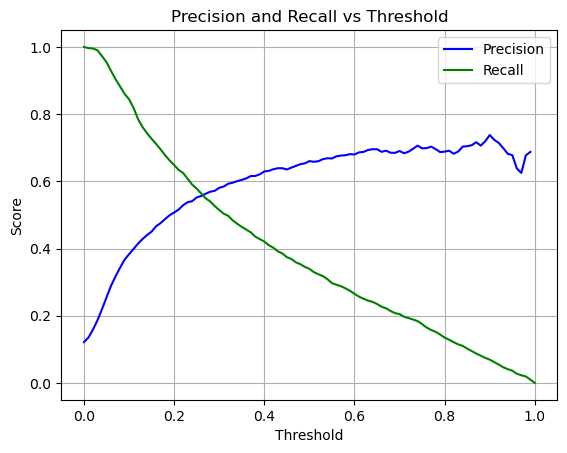

Precision and Recall curves intersect at threshold: 0.260


In [37]:
# Plot Precision and Recall
plt.figure()
plt.plot(df_scores['threshold'], df_scores['p'], label='Precision', color='blue')
plt.plot(df_scores['threshold'], df_scores['r'], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

# Find the intersection point where precision equals recall
intersection_point = df_scores[np.isclose(df_scores['p'], df_scores['r'], atol=0.01)]
if not intersection_point.empty:
    print(f"Precision and Recall curves intersect at threshold: {intersection_point['threshold'].values[0]:.3f}")
else:
    print("Precision and Recall curves do not intersect within the given tolerance.")

#### Question 4: F1 score

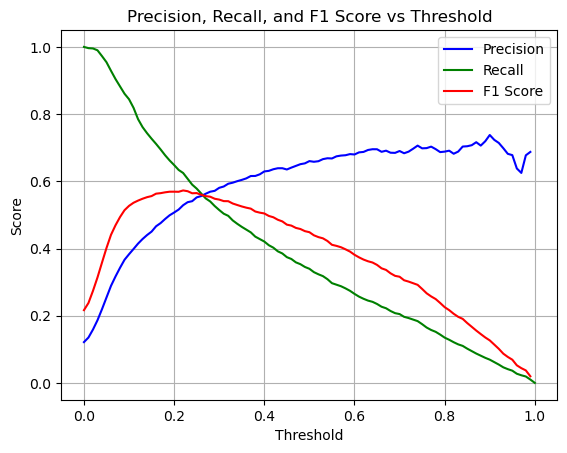

F1 score is maximal at threshold: 0.220 with F1 score: 0.573


In [38]:
# Calculate F1 score (handling cases where precision + recall == 0)
df_scores['f1'] = 2 * (df_scores['p'] * df_scores['r']) / (df_scores['p'] + df_scores['r']).replace(0, np.nan)

# Plot Precision, Recall, and F1 Score
plt.figure()
plt.plot(df_scores['threshold'], df_scores['p'], label='Precision', color='blue')
plt.plot(df_scores['threshold'], df_scores['r'], label='Recall', color='green')
plt.plot(df_scores['threshold'], df_scores['f1'], label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Threshold')
plt.legend()
plt.grid()
plt.show()

# Find the threshold where F1 score is maximal
max_f1_row = df_scores.loc[df_scores['f1'].idxmax()]
max_f1_threshold = max_f1_row['threshold']
max_f1_value = max_f1_row['f1']

print(f"F1 score is maximal at threshold: {max_f1_threshold:.3f} with F1 score: {max_f1_value:.3f}")

#### Question 5: 5-Fold CV

In [44]:
from tqdm.auto import tqdm

In [49]:

def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [55]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    y_train = df_train.y

    df_val = df_full_train.iloc[val_idx]
    y_val = df_val.y

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)
    
np.array(aucs).round(3)

print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.906 ± 0.006


#### Question 6: Hyperparameter Tuning

In [60]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)

    return dv, model

def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred


nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)



for C in [0.000001, 0.001, 1]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        y_train = df_train.y
        
        df_val = df_full_train.iloc[val_idx]
        y_val = df_val.y
        
        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=1e-06, auc = 0.701 ± 0.009
C=0.001, auc = 0.861 ± 0.007
C=1, auc = 0.906 ± 0.006
